In [108]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np
import os

In [109]:
text_prompt = "luxury bedroom interior"

In [110]:
no_crop_img = Image.open("Metadata/No Crop /2_nocrop.png")
crop_img = Image.open("Metadata/Images/2.png")

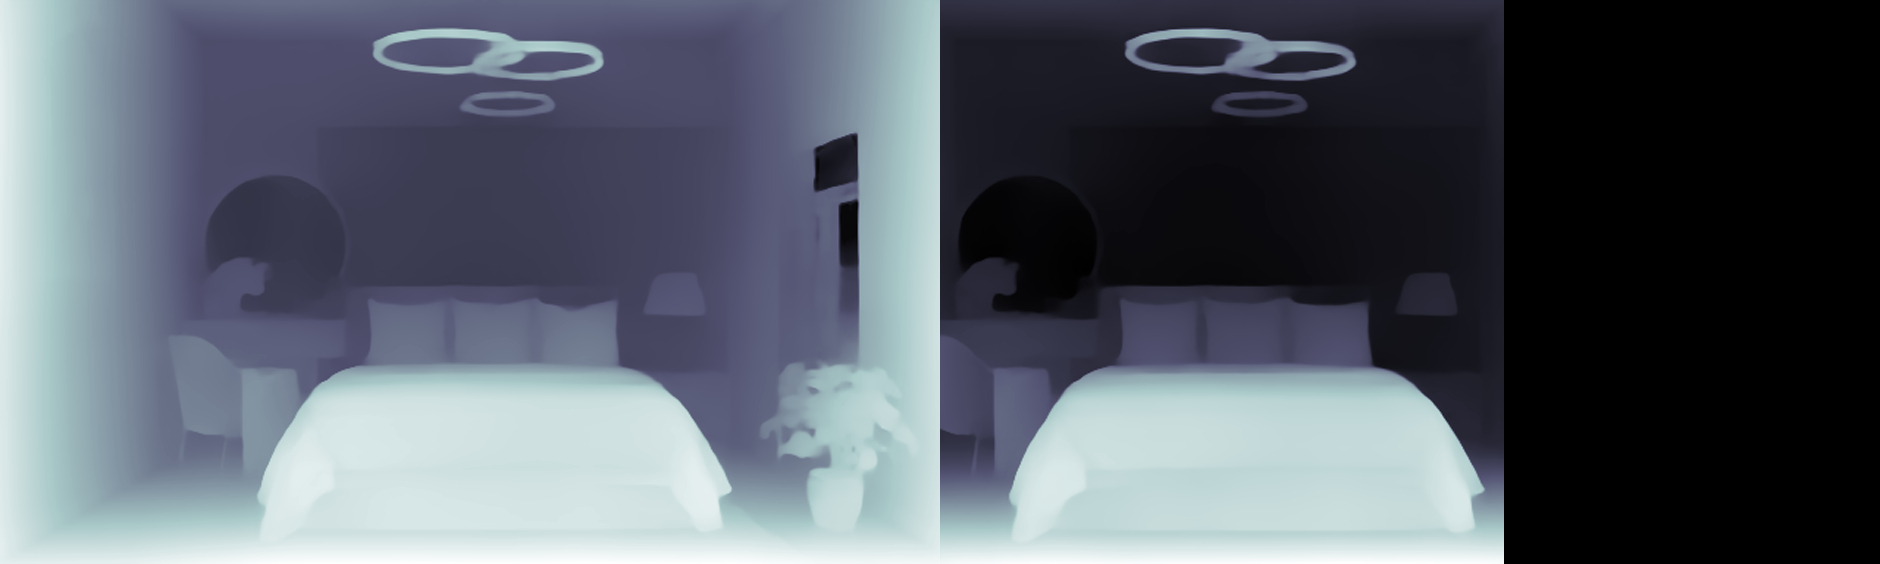

In [111]:
make_image_grid(images = [no_crop_img , crop_img] ,rows = 1, cols = 2)

In [112]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


Loading pipeline components...:   0%|                                                                       | 0/7 [00:00<?, ?it/s]/home/users/shubham.kumar/miniconda3/envs/qct/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.46it/s]


In [113]:
# Set the seed for reproducibility
seed = 12345
generator = torch.Generator().manual_seed(seed)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 19.01it/s]


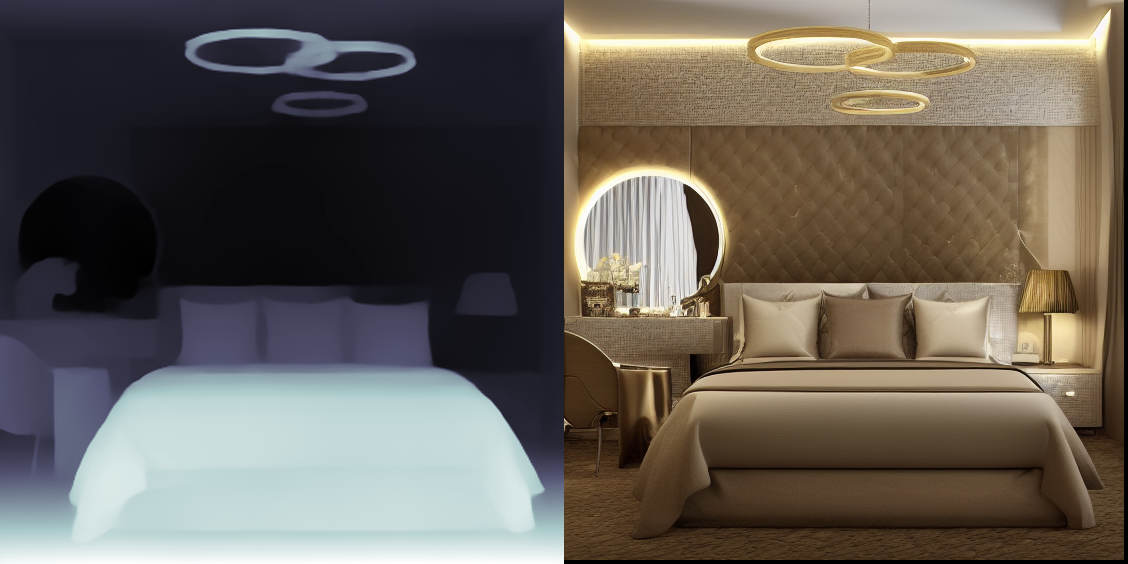

In [114]:
depth_image = crop_img
output = pipe(
    text_prompt, image=depth_image, generator=generator
).images[0]
make_image_grid([depth_image, output], rows=1, cols=2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 14.13it/s]


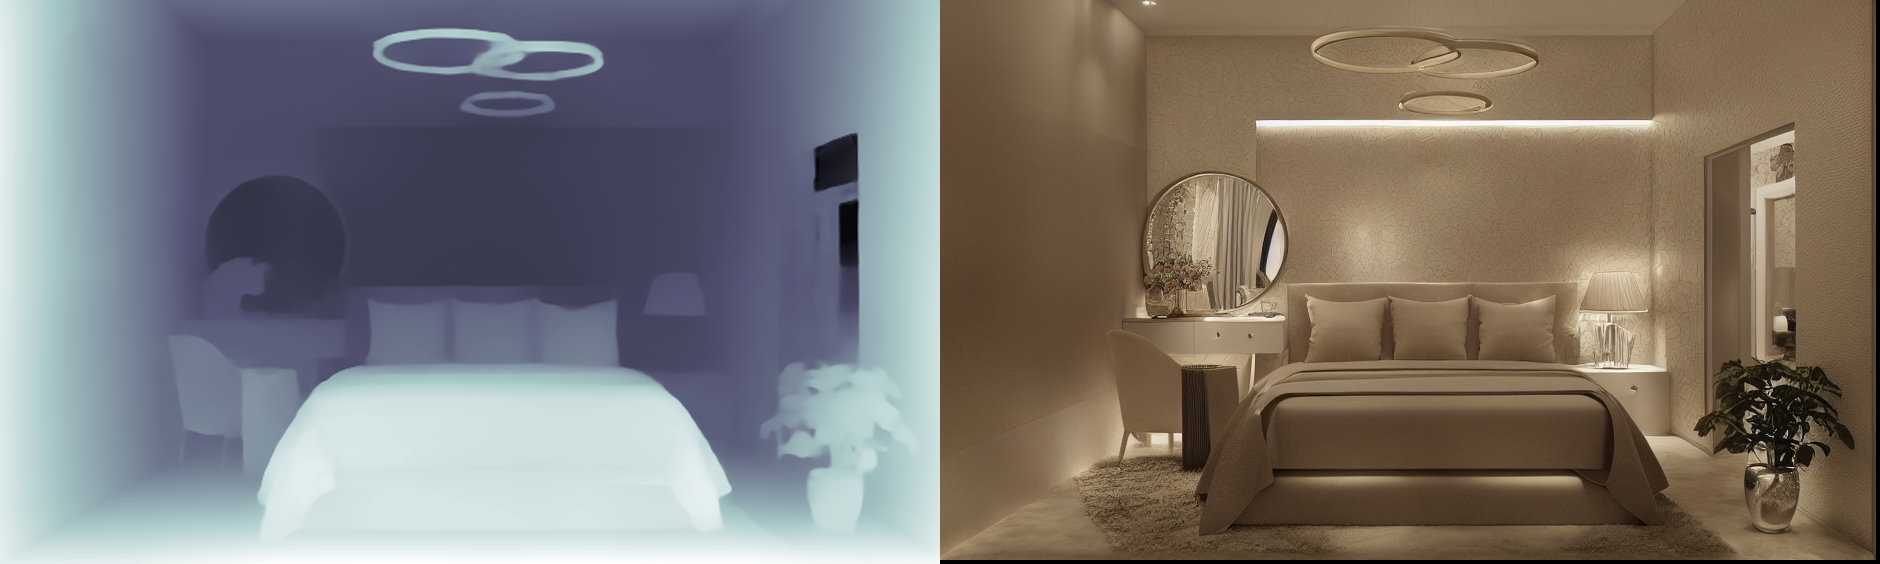

In [115]:
depth_image = no_crop_img
output = pipe(
    text_prompt, image=depth_image, generator=generator
).images[0]
make_image_grid([depth_image, output], rows=1, cols=2)